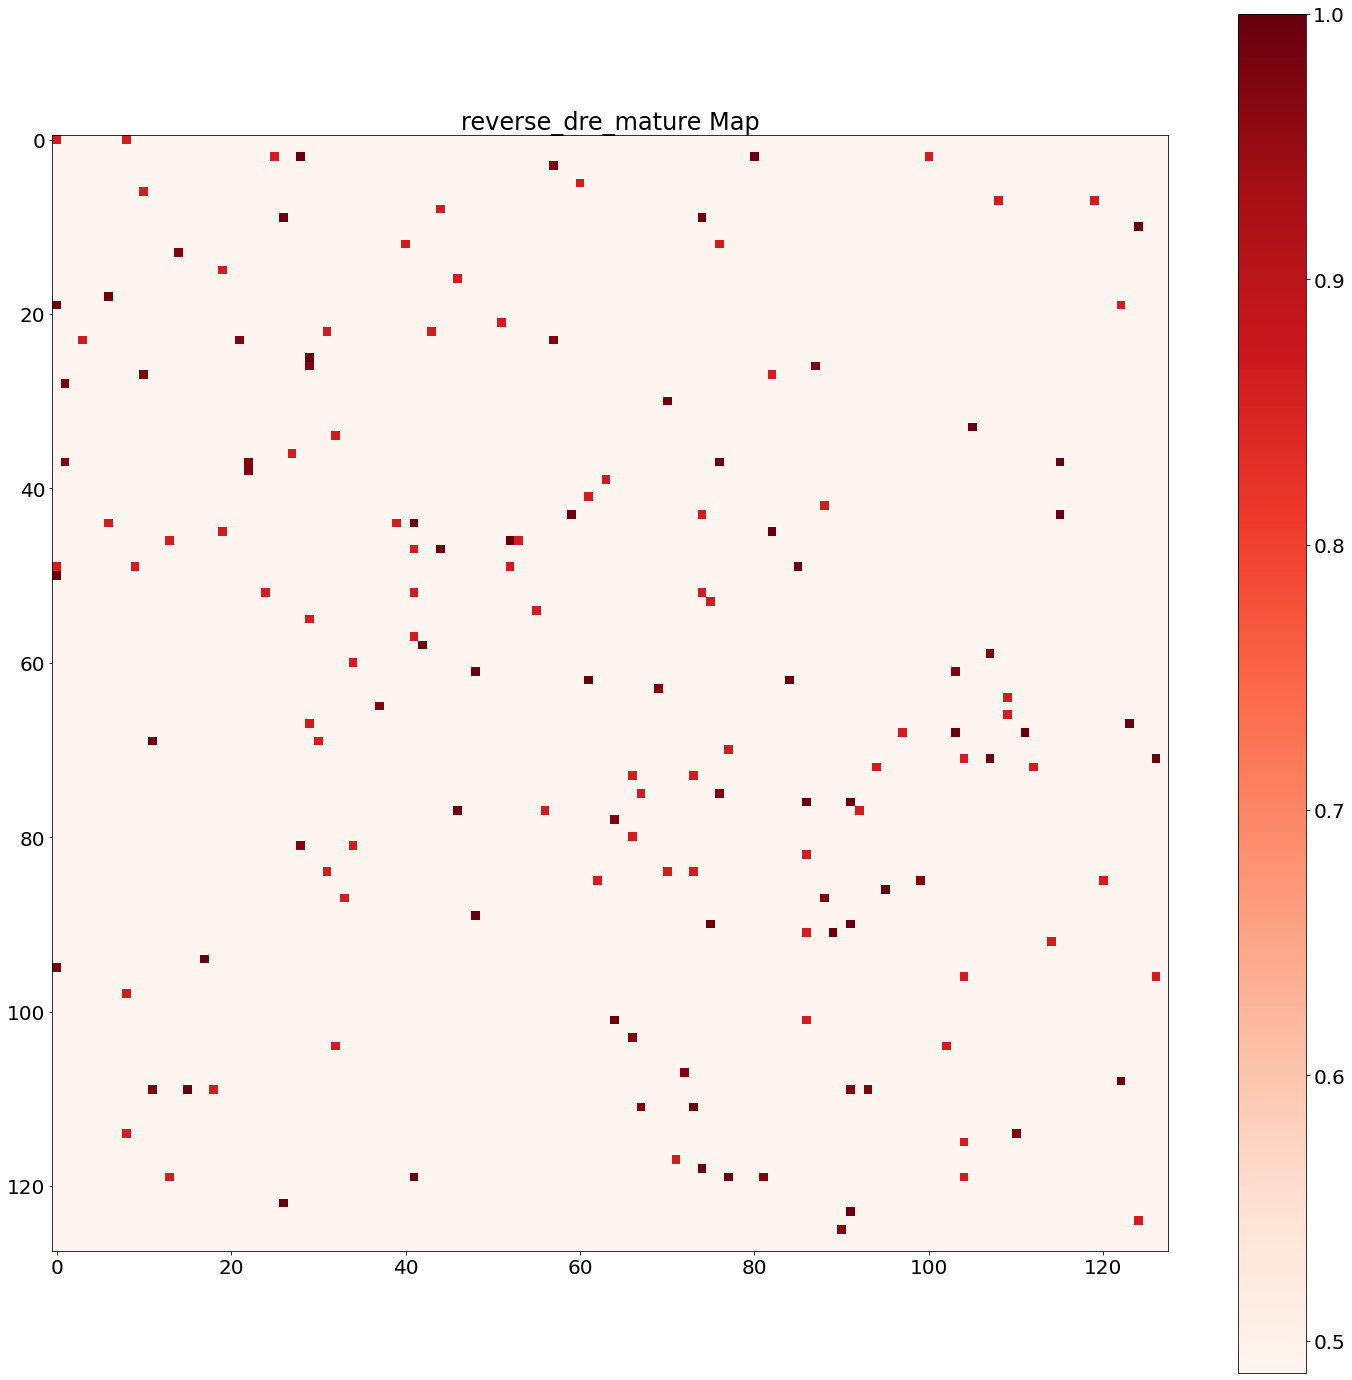

In [5]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np
from numpy import loadtxt

from collections import Counter

from sklearn import preprocessing

SIZE = 7
def sequence_count(string, dictionary):
    for i in range(len(string)-(SIZE-1)):
        temp_seq = string[i:i+(SIZE)].lower()
        dictionary[temp_seq]+= 1
    return dictionary

def print_map(filename, map_):
    df=pd.DataFrame(map_)
    df.to_csv(filename+'.csv', index= False, header = False)


def make_map(filename):
    filename_data = loadtxt(filename+".txt", comments=">", delimiter="\z",dtype="str")

    #replace all the U's with T's
    filename_data = [sub.replace('U', 'T') for sub in filename_data]
    
    #remove all the N's
    for i in filename_data:
        if 'N' in i:
            filename_data.remove(i)

    #create the dictionary
    df = pd.read_csv("AGTC-7seq.csv", header = None)
    data_arr = np.array(df).flatten()

    data_dict = {data_arr[i]: 0 for i in range(0, len(data_arr))}

    #Update the dictionary:
    for i in filename_data:
        data_dict= sequence_count(i,data_dict)

    #Convert dictionary back into 1D array
    data_arr1 = np.array(list(data_dict.values()))

    #Convert 1D array back into a 2D array
    data_arr2 = np.reshape(data_arr1, (2**SIZE,2**SIZE))

    #save the map as a csv
    print_map(filename+"_map", data_arr2)

    #map 2D array
    df = pd.read_csv(filename+"_map.csv", header = None)
    data = np.array(df)

    #standardized the data with mean and std, then putting it through a sigmoid function 
    def sigmoid(x):
        e = np.exp(1)
        y = 1/(1+e**(-x))
        return y

    data = (data - data.mean())/(data.std())
    
    data = sigmoid(data)

    fig = plt.figure(figsize=(25,25))
    plt.imshow(data,cmap="Reds")
    plt.rc('font', size=20)
    plt.title(filename+" Map")
    plt.colorbar()
    plt.savefig(filename+" Map")
    plt.show()
    
make_map("reverse_dre_mature")